<h1>Data cleaning</h1>
<p>We created a list with what needed doing in regards to data cleaning:</p>
<ol>
  <li>Examine the data to find any problems:
    <ul>
      <li>Missing data heatmap</li>
      <li>Irregular data bar chart</li>
    </ul>
  </li>
  <li>Find missing data and add default values if required</li>
  <li>Remove any incomplete columns or rows</li>
  <li>Remove any unneccessary data:
    <ul>
      <li>Uninformative</li>
      <li>Repetative</li>
      <li>Duplicates</li>
    </ul>
  </li>
  <li>Normalise data types, e.g. strings <-> int</li>
  <li>Change casing, remove whitespace</li>
  <li>Rename columns if required</li>
  <li>Save the data as a new file</li>
</ol>


<h3>Before starting on cleaning, we needed to install various packages to be able to access the data and clean it.</h3>

In [1]:
# Import pandas for loading data and exploration
import pandas as pd
# Installing the seaborn library from Matplotlib for visualisations
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [40]:
path = '../final_project/final_combined_olympics_dataset.csv'
# Reading the data from the csv file
df_olympics = pd.read_csv(path)

C:\Users\elean\AppData\Local\Temp\ipykernel_69148\2667525156.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_olympics = pd.read_csv(path)


<h2>Step 1</h2>
<ul>
  <li>Examine the data to find any problems:
      <ul>
        <li>Missing data heatmap</li>
        <li>Irregular data bar chart</li>
      </ul>
  </li>
</ul>
<p>We have printed the data's shape, to understand the size of it. We then printed both the head and tail. We discovered that there was no order to the data, so reordered by year, then by NOC - which stands for National Olympic Committee, and is the abbreviation of each country -, followed by sport and finally event. We used both info and describe functions to give us a quick visulisation of the different columns.</p>
  

In [38]:
# Printing the data shape
df_olympics.shape

(87682, 16)

In [39]:
# Printing the data head (first 5 rows)
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Discipline
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN


In [6]:
# Printing the data tail (last 5 rows)
df_olympics.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Discipline
87677,NaN,Josef Stalder,M,33.0,NaN,NaN,Switzerland,SUI,1952 Summer,1952,Summer,Helsinki,Gymnastics,"Horse Vault, Men",NaN,NaN
87678,NaN,Josef Stalder,M,33.0,NaN,NaN,Switzerland,SUI,1952 Summer,1952,Summer,Helsinki,Gymnastics,"Parallel Bars, Men",Bronze,NaN
87679,NaN,Josef Stalder,M,33.0,NaN,NaN,Switzerland,SUI,1952 Summer,1952,Summer,Helsinki,Gymnastics,"Horizontal Bar, Men",Silver,NaN
87680,NaN,Josef Stalder,M,33.0,NaN,NaN,Switzerland,SUI,1952 Summer,1952,Summer,Helsinki,Gymnastics,"Rings, Men",NaN,NaN
87681,NaN,Josef Stalder,M,33.0,NaN,NaN,Switzerland,SUI,1952 Summer,1952,Summer,Helsinki,Gymnastics,"Pommelled Horse, Men",NaN,NaN


In [7]:
df_olympics.info()
# Gives us a quick visualisation of the ID, Age, Height, Weight, Year column
df_olympics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87682 entries, 0 to 87681
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          85120 non-null  float64
 1   Name        87682 non-null  object 
 2   Sex         87682 non-null  object 
 3   Age         84951 non-null  float64
 4   Height      53746 non-null  float64
 5   Weight      52899 non-null  float64
 6   Team        87682 non-null  object 
 7   NOC         87682 non-null  object 
 8   Games       87682 non-null  object 
 9   Year        87682 non-null  int64  
 10  Season      87682 non-null  object 
 11  City        87682 non-null  object 
 12  Sport       87682 non-null  object 
 13  Event       87682 non-null  object 
 14  Medal       13761 non-null  object 
 15  Discipline  15121 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 10.7+ MB


,ID,Age,Height,Weight,Year
count,8.512000e+04,84951.000000,53746.000000,52899.000000,87682.000000
mean,2.606752e+05,25.868430,175.505303,70.900216,1985.214183
std,5.234924e+05,6.358307,10.384203,14.217489,31.702282
min,1.000000e+00,11.000000,127.000000,25.000000,1896.000000
25%,1.123300e+04,22.000000,168.000000,61.000000,1964.000000
50%,2.195600e+04,25.000000,175.000000,70.000000,1992.000000
75%,3.270725e+04,29.000000,183.000000,79.000000,2012.000000
max,1.919333e+06,88.000000,223.000000,214.000000,2022.000000


<p>From this analysis of the data in it's current state, we can clearly see that in ID, Age, Height, Weight, Medal and Discipline there are currently NaN values. We will address these later on in the cleaning process.</p>

In [8]:
# Sorting the data so it is ordered by Olympics year (so that we can see all the data for that year), then NOC (alphabetical), then sport (alphabetical), then event (so that each event is together).

df_olympics = df_olympics.sort_values(by=['Year', 'NOC', 'Sport', 'Event'])
df_olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Discipline
51139,26280.0,Georges Daviel de la Nzire,M,17.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,NaN,NaN
33940,17492.0,Eugne Henri Callot,M,20.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",Silver,NaN
51201,26315.0,Henri de Laborde,M,NaN,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",NaN,NaN
52537,26984.0,J. Defert,M,NaN,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,NaN,NaN
63067,32330.0,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86312,NaN,Alexander Bolshunov,M,25.0,NaN,NaN,Olympic Athletes from Russia,ROC,2022 Winter,2022,Winter,Beijing,Cross-country skiing,"Sprint, Men",NaN,NaN
86317,NaN,Alexander Bolshunov,M,25.0,NaN,NaN,Olympic Athletes from Russia,ROC,2022 Winter,2022,Winter,Beijing,Cross-country skiing,"Team Sprint, Men",Bronze,NaN
86270,NaN,Charlotte Kalla,F,34.0,NaN,NaN,Sweden,SWE,2022 Winter,2022,Winter,Beijing,Cross-country skiing,"10 kilometres, Women",NaN,NaN
86272,NaN,Charlotte Kalla,F,34.0,NaN,NaN,Sweden,SWE,2022 Winter,2022,Winter,Beijing,Cross-country skiing,"15 kilometres Skiathlon, Women",NaN,NaN


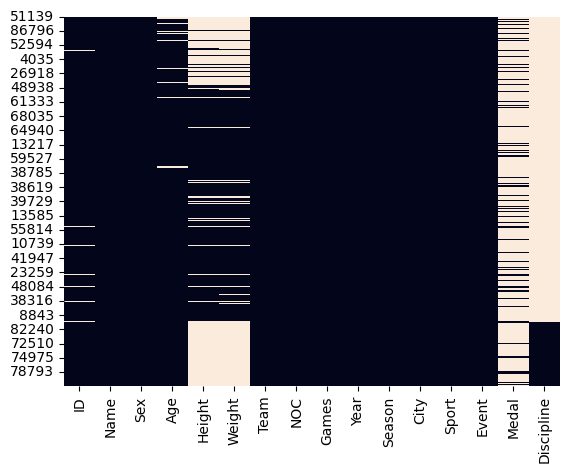

In [9]:
# Missing data heatmap - get the visualisation of which data is missing
sns.heatmap(df_olympics.isnull(), cbar=False)
plt.show()

<p>From the heatmap, we can see that there is missing data for 'ID', 'Age', 'Height', 'Weight', 'Medal' and 'Discipline'. We decided to find the median of the age data to replace the NaN values, as the age is useful to our analysis. For 'ID','Height', 'Weight' and 'Discipline' we decided to remove them as these columns had a significant number of NaN values, and also had no relevance to the future analysis. The medal column will be remaining, as we will be looking at this data, but we will replace the missing data with 'None', so that in our analysis it is clear what that value represents.</p>

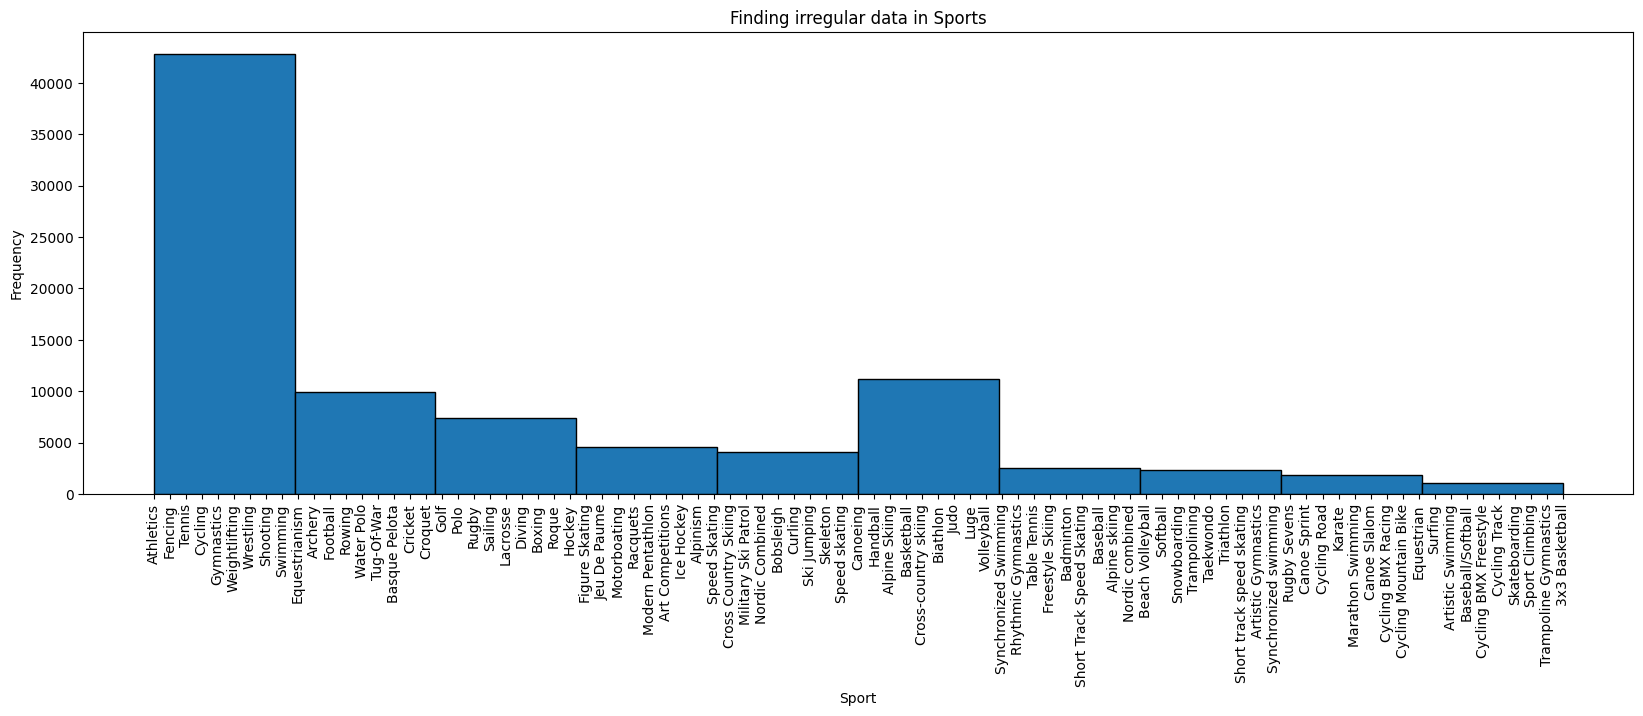

In [10]:
# Irregular Data (Histogram)
x = df_olympics['Sport']
plt.figure(figsize=(20, 6))
plt.hist(x, edgecolor = "black")
plt.xticks(rotation=90)
plt.title("Finding irregular data in Sports")
plt.xlabel("Sport")
plt.ylabel("Frequency")
plt.show()

<p>From the histogram above, we can clearly see that there are over 40,000 data entries for Athletics, Fencing, Tennis, Gymnastics, Cycling, Weightligting, Wrestling, Shooting and Swimming. Although initially we thought we might remove the sports with the fewest entries - as we expected these to be the least popular and the oldest that are no longer exhibited at the Olympics - the data shows that these are some of the sports that have been added most recently, therefore are relevant to our analysis.</p>

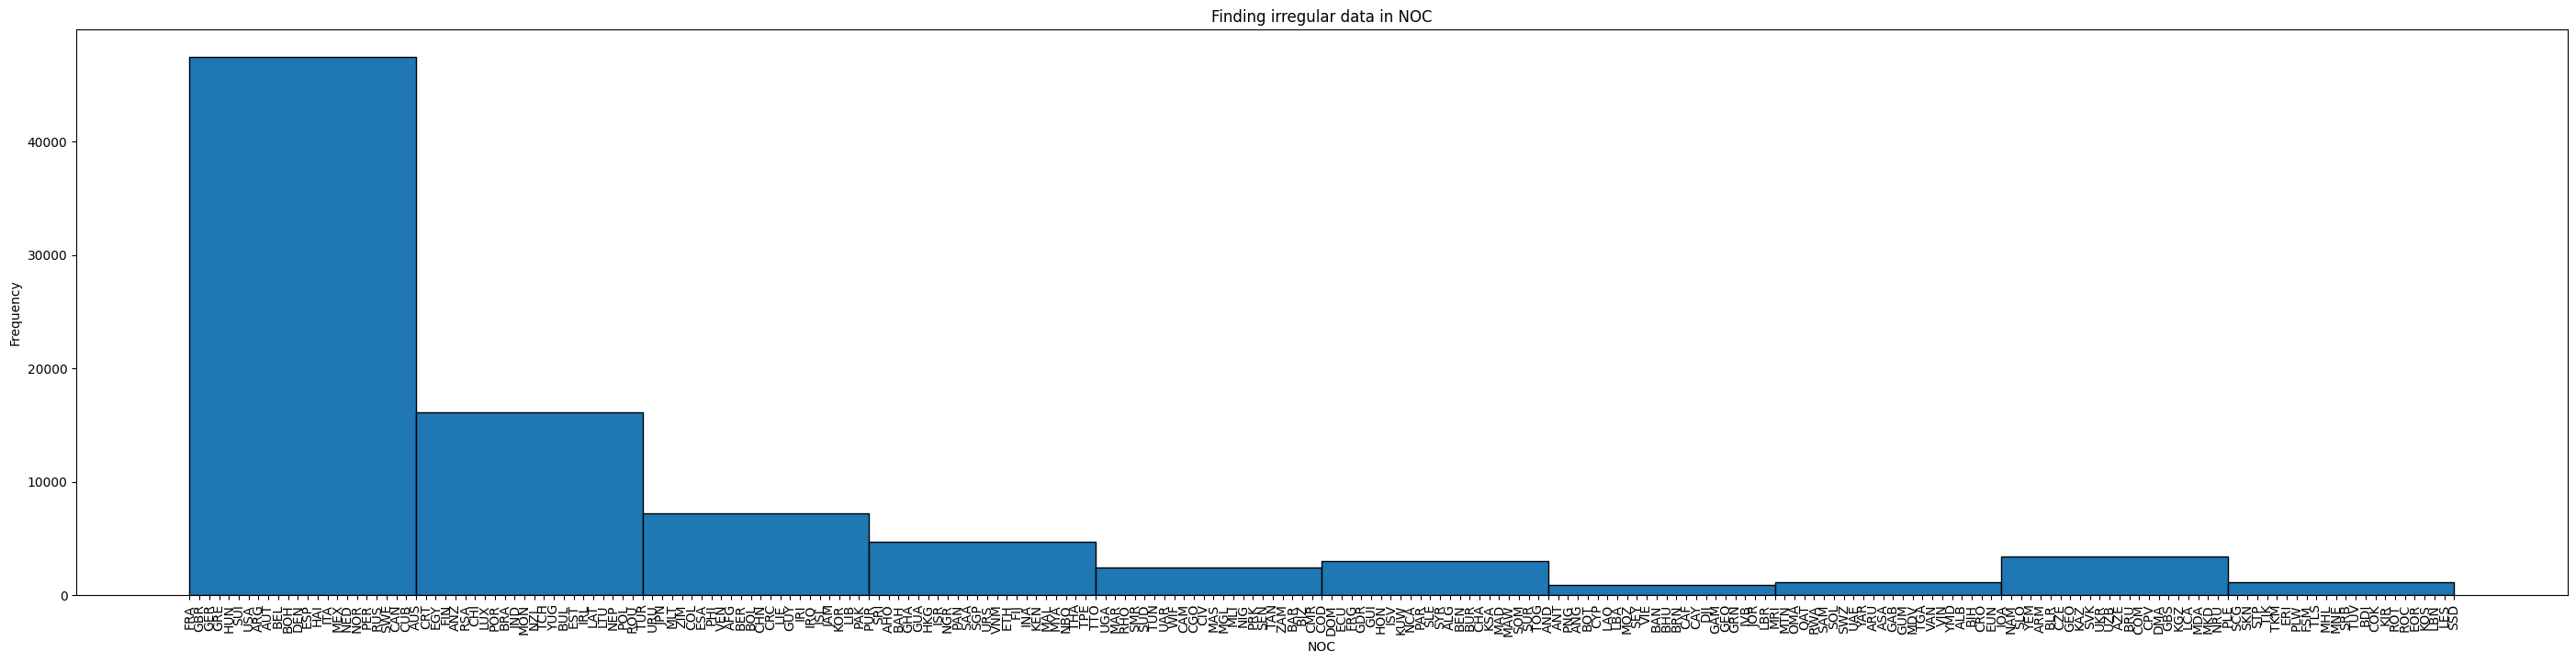

In [11]:
# Irregular Data (Histogram)
x = df_olympics['NOC']
plt.figure(figsize=(35, 8))
plt.hist(x, edgecolor = 'black')
plt.xticks(rotation=90)
plt.title("Finding irregular data in NOC")
plt.xlabel("NOC")
plt.ylabel("Frequency")
plt.show()

<p>From this histogram, we can clearly see that some NOC have very low numbers. We decided to find out which countries these are, and to decide whether these are relevant to our data analysis

<h2>Step 2</h2>
<ul>
  <li>Find missing data and add default values if required</li>
</ul>

<p>As shown in the heatmap, the column which has missing data and requires a default value is 'Medal'. For the NaN values in 'Medal' we decided to use 'None' as the value, so that when we are analysing it is very clear that it represents no medal being awarded for that athlete.</p>

In [12]:
# Add 'None'' string in Medal column where is NaN value
df_olympics_cleaned = df_olympics.copy()
df_olympics_cleaned.Medal = df_olympics.Medal.fillna('None')
df_olympics_cleaned.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Discipline
51139,26280.0,Georges Daviel de la Nzire,M,17.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,None,NaN
33940,17492.0,Eugne Henri Callot,M,20.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",Silver,NaN
51201,26315.0,Henri de Laborde,M,NaN,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",None,NaN
52537,26984.0,J. Defert,M,NaN,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,None,NaN
63067,32330.0,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,None,NaN


<p>For the missing data in the 'Ages' column, we decided to add the median value.</p>

In [13]:
median_age = df_olympics_cleaned['Age'].median()
df_olympics_cleaned.Age = df_olympics.Age.fillna(median_age)
df_olympics_cleaned.head(5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Discipline
51139,26280.0,Georges Daviel de la Nzire,M,17.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,None,NaN
33940,17492.0,Eugne Henri Callot,M,20.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",Silver,NaN
51201,26315.0,Henri de Laborde,M,25.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",None,NaN
52537,26984.0,J. Defert,M,25.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,None,NaN
63067,32330.0,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,None,NaN


<h2>Step 3</h2>
<ul>
  <li>Remove any incomplete columns or rows</li>
</ul>
<p>Here we decided to remove the 'Discipline', 'Height', 'Weight' and 'ID' columns, as they have NaN data and is not relevant to the analysis we know we are going to complete.</p>
<p>We also looked at the years of each Olympic games, and decided that the years most relevant to our analysis are the post WW2 years. We decided to create three separate datasets, one that has pre-WW2 data, one that has post-WW2 data, and the final one will have all of it. This means that we can easily analysis the data that is modern, without skewing it with historical data, but still have access to the historical data to be able to analyse trends.</p>
<p>Initally we had done the dropping of those rows in this section, but quickly discovered it meant repeating the rest of the cleaning 3 times! We then moved the dropping of those rows to the final stage, once the rest of the cleaning was done.

In [14]:
# Dropping columns
df_olympics_cleaned = df_olympics_cleaned.drop(['Discipline'], axis=1)

df_olympics_cleaned = df_olympics_cleaned.drop(['Height'], axis=1)

df_olympics_cleaned = df_olympics_cleaned.drop(['Weight'], axis=1)

df_olympics_cleaned = df_olympics_cleaned.drop(['ID'], axis=1)
df_olympics_cleaned.head(5)

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
51139,Georges Daviel de la Nzire,M,17.0,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,None
33940,Eugne Henri Callot,M,20.0,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",Silver
51201,Henri de Laborde,M,25.0,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",None
52537,J. Defert,M,25.0,France,FRA,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,None
63067,Launceston Elliot,M,21.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,None


In [15]:
df_olympics_cleaned.shape

(87682, 12)

<p>We then redid the heatmap and .info so that we could see the changes visually.</p>

<class 'pandas.core.frame.DataFrame'>
Index: 87682 entries, 51139 to 86271
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    87682 non-null  object 
 1   Sex     87682 non-null  object 
 2   Age     87682 non-null  float64
 3   Team    87682 non-null  object 
 4   NOC     87682 non-null  object 
 5   Games   87682 non-null  object 
 6   Year    87682 non-null  int64  
 7   Season  87682 non-null  object 
 8   City    87682 non-null  object 
 9   Sport   87682 non-null  object 
 10  Event   87682 non-null  object 
 11  Medal   87682 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.7+ MB
None


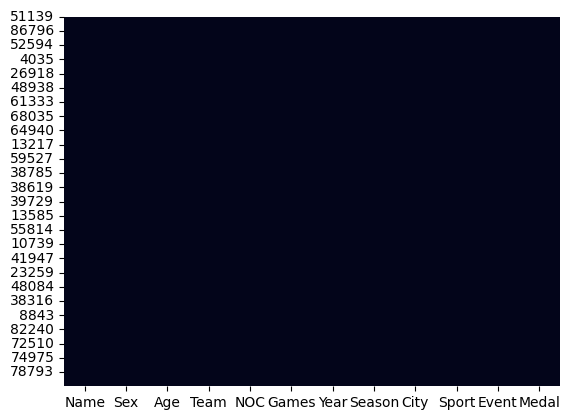

In [16]:
print(df_olympics_cleaned.info())
# Missing data heatmap - get the visualisation of which data is missing, if any is
sns.heatmap(df_olympics_cleaned.isnull(), cbar=False)
plt.show()

<p>From this we can clearly see there is no missing data.</p>

<h2>Step 4</h2>
<ul>
  <li>Remove any unneccessary data:
    <ul>
      <li>Uninformative</li>
      <li>Repetative</li>
      <li>Duplicates</li>
    </ul>
  </li>
</ul>
<p>During the process of cleaning, we discovered that there was a team 'Acturus' (which is the name of a star) with only 1 entry. We realised that the team names don't necessarily correspond with the NOC and country name. From this we decided to see which NOC's had less than 10 entries, to decide whether they were relevant to our analysis.</p>

In [17]:
noc_counts = df_olympics_cleaned['NOC'].value_counts().to_frame()
print(noc_counts[noc_counts['count'] < 10])


     count
NOC       
CAM      9
FSM      9
BUR      9
TGA      9
SOL      9
YAR      8
NRU      8
BDI      8
PLW      7
DMA      7
BRU      7
TLS      6
LBN      6
ROT      6
CRT      5
WIF      5
VNM      4
KIR      4
RHO      4
MHL      4
TUV      3
NBO      2
LES      2
SSD      2
YMD      1


<p>After futher analysis of what the codes represent, we discovered that some were for countries that no longer exist. Although this isn't relevant for our modern data analysis, they could be relevant if we look at historical data.</p>
<p>We then decided to add in an extra column for country name. This is because we aren't sure what all the NOC's stand for and the team names aren't always the country names.</p>

In [18]:
# Adding in an empty column called 'Country'
df_olympics_cleaned.insert(4, 'Country', '')
df_olympics_cleaned.head()

,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
51139,Georges Daviel de la Nzire,M,17.0,France,,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,None
33940,Eugne Henri Callot,M,20.0,France,,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",Silver
51201,Henri de Laborde,M,25.0,France,,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",None
52537,J. Defert,M,25.0,France,,FRA,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,None
63067,Launceston Elliot,M,21.0,Great Britain,,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,None


In [19]:
# Creating a function which has each NOC code and their corresponding country.
def noc_code_finder(noc):
  noc_codes = [{"code": "AFG", "country": "Afghanistan"}, {"code": "AHO", "country": "Netherlands Antilles"}, {"code": "ALB", "country": "Albania"}, {"code": "ALG", "country": "Algeria"},
              {"code": "AND", "country": "Andorra"}, {"code": "ANG", "country": "Angola"}, {"code": "ANT", "country": "Antigua and Barbuda"}, {"code": "ANZ", "country": "Australasia"},
              {"code": "ARG", "country": "Argentina"}, {"code": "ARM", "country": "Armenia"}, {"code": "ARU", "country": "Aruba"}, {"code": "ASA", "country": "American Samoa"},
              {"code": "AUS", "country": "Australia"}, {"code": "AUT", "country": "Austria"}, {"code": "AZE", "country": "Azerbaijan"}, {"code": "BAH", "country": "Bahamas"},
              {"code": "BAN", "country": "Bangladesh"}, {"code": "BAR", "country": "Barbados"}, {"code": "BDI", "country": "Burundi"}, {"code": "BEL", "country": "Belgium"},
              {"code": "BEN", "country": "Benin"}, {"code": "BER", "country": "Bermuda"}, {"code": "BHU", "country": "Bhutan"}, {"code": "BIH", "country": "Bosnia and Herzegovina"},
              {"code": "BIZ", "country": "Belize"}, {"code": "BLR", "country": "Belarus"}, {"code": "BOH", "country": "Bohemia"}, {"code": "BOL", "country": "Bolivia"},
              {"code": "BOT", "country": "Botswana"}, {"code": "BRA", "country": "Brazil"}, {"code": "BRN", "country": "Bahrain"}, {"code": "BRU", "country": "Brunei"},
              {"code": "BUL", "country": "Bulgaria"}, {"code": "BUR", "country": "Burkina Faso"}, {"code": "CAF", "country": "Central African Republic"}, {"code": "CAM", "country": "Cambodia"},
              {"code": "CAN", "country": "Canada"}, {"code": "CAY", "country": "Cayman Islands"}, {"code": "CGO", "country": "Republic of the Congo"}, {"code": "CHA", "country": "Chad"},
              {"code": "CHI", "country": "Chile"}, {"code": "CHN", "country": "China"}, {"code": "CIV", "country": "Ivory Coast"}, {"code": "CMR", "country": "Cameroon"},
              {"code": "COD", "country": "Democratic Republic of the Congo"}, {"code": "COK", "country": "Cook Islands"}, {"code": "COL", "country": "Colombia"}, {"code": "COM", "country": "Comoros"},
              {"code": "CPV", "country": "Cape Verde"}, {"code": "CRC", "country": "Costa Rica"}, {"code": "CRO", "country": "Croatia"}, {"code": "CRT", "country": "Crete"}, {"code": "CUB", "country": "Cuba"},
              {"code": "CYP", "country": "Cyprus"}, {"code": "CZE", "country": "Czechia"}, {"code": "DEN", "country": "Denmark"}, {"code": "DJI", "country": "Djibouti"},
              {"code": "DMA", "country": "Dominica"}, {"code": "DMN", "country": "Dominica"}, {"code": "DOM", "country": "Dominican Republic"}, {"code": "ECU", "country": "Ecuador"},
              {"code": "EGY", "country": "Egypt"}, {"code": "EOR", "country": "Refugee Olympic Team"}, {"code": "ERI", "country": "Eritrea"}, {"code": "ESA", "country": "El Salvador"},
              {"code": "ESP", "country": "Spain"}, {"code": "EST", "country": "Estonia"}, {"code": "ETH", "country": "Ethiopia"}, {"code": "EUN", "country": "Unified Team"},
              {"code": "FIJ", "country": "Fiji"}, {"code": "FIN", "country": "Finland"}, {"code": "FRA", "country": "France"}, {"code": "FRG", "country": "West Germany"},
              {"code": "FSM", "country": "Federated States of Micronesia"}, {"code": "GAB", "country": "Gabon"}, {"code": "GAM", "country": "The Gambia"}, {"code": "GBR", "country": "Great Britain"},
              {"code": "GBS", "country": "Guinea-Bissau"}, {"code": "GDR", "country": "East Germany"}, {"code": "GEO", "country": "Georgia"}, {"code": "GEQ", "country": "Equatorial Guinea"},
              {"code": "GER", "country": "Germany"}, {"code": "GHA", "country": "Ghana"}, {"code": "GRE", "country": "Greece"}, {"code": "GRN", "country": "Grenada"},
              {"code": "GUA", "country": "Guatemala"}, {"code": "GUI", "country": "Guinea"}, {"code": "GUM", "country": "Guam"}, {"code": "GUY", "country": "Guyana"},
              {"code": "HAI", "country": "Haiti"}, {"code": "HKG", "country": "Hong Kong"}, {"code": "HON", "country": "Honduras"}, {"code": "HUN", "country": "Hungary"},
              {"code": "INA", "country": "Indonesia"}, {"code": "IND", "country": "India"}, {"code": "IOA", "country": "Independent Olympic Athletes"}, {"code": "IRI", "country": "Iran"},
              {"code": "IRL", "country": "Ireland"}, {"code": "IRQ", "country": "Iraq"}, {"code": "ISL", "country": "Iceland"}, {"code": "ISR", "country": "Israel"},
              {"code": "ISV", "country": "Virgin Islands"}, {"code": "ITA", "country": "Italy"}, {"code": "IVB", "country": "British Virgin Islands"}, {"code": "JAM", "country": "Jamaica"},
              {"code": "JOR", "country": "Jordan"}, {"code": "JPN", "country": "Japan"}, {"code": "KAZ", "country": "Kazakhstan"}, {"code": "KEN", "country": "Kenya"},
              {"code": "KGZ", "country": "Kyrgyzstan"}, {"code": "KIR", "country": "Kiribati"}, {"code": "KOR", "country": "South Korea"}, {"code": "KOS", "country": "Kosovo"},
              {"code": "KSA", "country": "Saudi Arabia"}, {"code": "KUW", "country": "Kuwait"}, {"code": "LAO", "country": "Laos"}, {"code": "LAT", "country": "Latvia"},
              {"code": "LBA", "country": "Libya"}, {"code": "LBN", "country": "Lebanon"}, {"code": "LIB", "country": "Lebanon"}, {"code": "LBR", "country": "Liberia"},
              {"code": "LCA", "country": "Saint Lucia"}, {"code": "LES", "country": "Lesotho"}, {"code": "LIE", "country": "Liechtenstein"}, {"code": "LTU", "country": "Lithuania"},
              {"code": "LUX", "country": "Luxembourg"}, {"code": "MAD", "country": "Madagascar"}, {"code": "MAR", "country": "Morocco"}, {"code": "MAS", "country": "Malaysia"},
              {"code": "MAL", "country": "Malaya"}, {"code": "MAW", "country": "Malawi"}, {"code": "MDA", "country": "Moldova"}, {"code": "MDV", "country": "Maldives"},
              {"code": "MEX", "country": "Mexico"}, {"code": "MGL", "country": "Mongolia"}, {"code": "MHL", "country": "Marshall Islands"}, {"code": "MKD", "country": "North Macedonia"},
              {"code": "MLI", "country": "Mali"}, {"code": "MLT", "country": "Malta"}, {"code": "MNE", "country": "Montenegro"}, {"code": "MON", "country": "Monaco"},
              {"code": "MOZ", "country": "Mozambique"}, {"code": "MRI", "country": "Mauritius"}, {"code": "MTN", "country": "Mauritania"}, {"code": "MYA", "country": "Myanmar"},
              {"code": "NAM", "country": "Namibia"}, {"code": "NBO", "country": "North Borneo"}, {"code": "NCA", "country": "Nicaragua"}, {"code": "NED", "country": "Netherlands"},
              {"code": "NEP", "country": "Nepal"}, {"code": "NGR", "country": "Nigeria"}, {"code": "NIG", "country": "Niger"}, {"code": "NOR", "country": "Norway"},
              {"code": "NRU", "country": "Nauru"}, {"code": "NZL", "country": "New Zealand"}, {"code": "OMA", "country": "Oman"}, {"code": "PAK", "country": "Pakistan"},
              {"code": "PAN", "country": "Panama"}, {"code": "PAR", "country": "Paraguay"}, {"code": "PER", "country": "Peru"}, {"code": "PHI", "country": "Philippines"},
              {"code": "PLE", "country": "Palestine"}, {"code": "PLW", "country": "Palau"}, {"code": "PNG", "country": "Papua New Guinea"}, {"code": "POL", "country": "Poland"},
              {"code": "POR", "country": "Portugal"}, {"code": "PRK", "country": "North Korea"}, {"code": "PUR", "country": "Puerto Rico"}, {"code": "QAT", "country": "Qatar"},
              {"code": "RHO", "country": "Rhodesia"}, {"code": "ROC", "country": "Russian Olympic Committee"}, {"code": "ROT", "country": "Refugee Olympic Team"}, {"code": "ROU", "country": "Romania"},
              {"code": "RSA", "country": "South Africa"}, {"code": "RUS", "country": "Russia"}, {"code": "RWA", "country": "Rwanda"}, {"code": "SAA", "country": "Saar"},
              {"code": "SAM", "country": "Samoa"}, {"code": "SCG", "country": "Serbia and Montenegro"}, {"code": "SEN", "country": "Senegal"}, {"code": "SEY", "country": "Seychelles"},
              {"code": "SGP", "country": "Singapore"}, {"code": "SKN", "country": "Saint Kitts and Nevis"}, {"code": "SLE", "country": "Sierra Leone"}, {"code": "SLO", "country": "Slovenia"},
              {"code": "SMR", "country": "San Marino"}, {"code": "SOL", "country": "Solomon Islands"}, {"code": "SOM", "country": "Somalia"}, {"code": "SRB", "country": "Serbia"},
              {"code": "SRI", "country": "Sri Lanka"}, {"code": "SSD", "country": "South Sudan"}, {"code": "STP", "country": "São Tomé and Príncipe"}, {"code": "SUD", "country": "Sudan"},
              {"code": "SUI", "country": "Switzerland"}, {"code": "SUR", "country": "Suriname"}, {"code": "SVK", "country": "Slovakia"}, {"code": "SWE", "country": "Sweden"},
              {"code": "SWZ", "country": "Eswatini"}, {"code": "SYR", "country": "Syria"}, {"code": "TAN", "country": "Tanzania"}, {"code": "TCH", "country": "Czechoslovakia"},
              {"code": "TGA", "country": "Tonga"}, {"code": "THA", "country": "Thailand"}, {"code": "TJK", "country": "Tajikistan"}, {"code": "TKM", "country": "Turkmenistan"},
              {"code": "TLS", "country": "East Timor"}, {"code": "TOG", "country": "Togo"}, {"code": "TPE", "country": "Chinese Taipei"}, {"code": "TTO", "country": "Trinidad and Tobago"},
              {"code": "TUN", "country": "Tunisia"}, {"code": "TUR", "country": "Turkey"}, {"code": "TUV", "country": "Tuvalu"}, {"code": "UAE", "country": "United Arab Emirates"},
              {"code": "UAR", "country": "United Arab Republic"}, {"code": "UGA", "country": "Uganda"}, {"code": "UKR", "country": "Ukraine"}, {"code": "URS", "country": "Soviet Union"},
              {"code": "URU", "country": "Uruguay"}, {"code": "USA", "country": "United States"}, {"code": "UZB", "country": "Uzbekistan"}, {"code": "VAN", "country": "Vanuatu"},
              {"code": "VEN", "country": "Venezuela"}, {"code": "VIE", "country": "Vietnam"}, {"code": "VNM", "country": "South Vietnam"}, {"code": "VIN", "country": "Saint Vincent and the Grenadines"},
              {"code": "WIF", "country": "West Indies Federation"}, {"code": "YAR", "country": "North Yemen"}, {"code": "YEM", "country": "Yemen"}, {"code": "YMD", "country": "South Yemen"}, {"code": "YUG", "country": "Yugoslavia"},
              {"code": "ZAM", "country": "Zambia"}, {"code": "ZIM", "country": "Zimbabwe"}]

  for noc_code in noc_codes:
    if noc == noc_code['code']:
      return noc_code['country']

#print(noc_code_finder('VNM'))

In [20]:
# Finding each NOC and adding the correct country name to the 'Country' column
# print(df_olympics_cleaned.head())

for index, row in df_olympics_cleaned.iterrows():
  df_olympics_cleaned.at[index, 'Country'] = noc_code_finder(row['NOC'])

df_olympics_cleaned.head()

,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
51139,Georges Daviel de la Nzire,M,17.0,France,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,None
33940,Eugne Henri Callot,M,20.0,France,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",Silver
51201,Henri de Laborde,M,25.0,France,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",None
52537,J. Defert,M,25.0,France,France,FRA,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,None
63067,Launceston Elliot,M,21.0,Great Britain,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,None


<p>We don't want any duplicates in our data, so have used the following code to remove any.</p>

In [21]:
# Checked the shape first
df_olympics_cleaned.shape

(87682, 13)

In [22]:
# Found out how many rows had duplicates
df_olympics_cleaned.duplicated().sum()

np.int64(387)

In [23]:
# To show the duplicate data, keep=False shows the all the duplicates, including the first occurance of that data. 
# This is to check it has correctly found duplicates.
df_olympics_cleaned.loc[df_olympics_cleaned.duplicated(keep=False), :]

,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
38628,Jean-Baptiste tienne August Charcot,M,23.0,Quand-Mme-2,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
38629,Jean-Baptiste tienne August Charcot,M,23.0,Quand-Mme-2,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
50230,Jacques d'Estournelles de Constant,M,25.0,Plume-Patte-5,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,None
50231,Jacques d'Estournelles de Constant,M,25.0,Plume-Patte-5,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,None
50233,Louis Etienne Jean Lonce Balluet d'Estournelle...,M,40.0,Pierre et Jean-4,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85325,Kyle Chalmers,M,18.0,Australia,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,Gold
38141,Kyle Chalmers,M,18.0,Australia,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
85326,Kyle Chalmers,M,18.0,Australia,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
38142,Kyle Chalmers,M,18.0,Australia,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Bronze


In [24]:
# To show just the duplicates, we change keep to equal 'first'
df_olympics_cleaned.loc[df_olympics_cleaned.duplicated(keep='first'), :]

,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
38629,Jean-Baptiste tienne August Charcot,M,23.0,Quand-Mme-2,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
50231,Jacques d'Estournelles de Constant,M,25.0,Plume-Patte-5,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,None
50234,Louis Etienne Jean Lonce Balluet d'Estournelle...,M,40.0,Pierre et Jean-4,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,None
50464,Pierre de Boulogne,M,25.0,Sidi-Fekkar-14,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,None
59996,Dupland,M,25.0,Galopin-9,France,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55626,Alex Walter Diggelmann,M,45.0,Switzerland,Switzerland,SUI,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",None
13222,Ferdinand Balcrek,M,43.0,Czechoslovakia,Czechoslovakia,TCH,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",None
85325,Kyle Chalmers,M,18.0,Australia,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,Gold
85326,Kyle Chalmers,M,18.0,Australia,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze


In [25]:
# Removing the duplicates
df_olympics_cleaned = df_olympics_cleaned.drop_duplicates(keep='first')

In [26]:
# Checked the shape again
df_olympics_cleaned.shape

(87295, 13)

In [27]:
# Checked to see if there were any duplicates left
df_olympics_cleaned.loc[df_olympics_cleaned.duplicated(keep=False), :]

,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal


<h2>Step 5</h2>
<ul>
  <li>Normalise data types, e.g. strings <-> int</li>
</ul>

In [28]:
df_olympics_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87295 entries, 51139 to 86271
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     87295 non-null  object 
 1   Sex      87295 non-null  object 
 2   Age      87295 non-null  float64
 3   Team     87295 non-null  object 
 4   Country  87295 non-null  object 
 5   NOC      87295 non-null  object 
 6   Games    87295 non-null  object 
 7   Year     87295 non-null  int64  
 8   Season   87295 non-null  object 
 9   City     87295 non-null  object 
 10  Sport    87295 non-null  object 
 11  Event    87295 non-null  object 
 12  Medal    87295 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 9.3+ MB


<p>From this quick overview, we want to make sure that there are strings and integers where required. The only one that needs changing is 'Age'. Currently it is a float, but we would like it as an integer.</p>

In [29]:
df_olympics_cleaned['Age'] = df_olympics_cleaned['Age'].astype("Int64")
df_olympics_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87295 entries, 51139 to 86271
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     87295 non-null  object
 1   Sex      87295 non-null  object
 2   Age      87295 non-null  Int64 
 3   Team     87295 non-null  object
 4   Country  87295 non-null  object
 5   NOC      87295 non-null  object
 6   Games    87295 non-null  object
 7   Year     87295 non-null  int64 
 8   Season   87295 non-null  object
 9   City     87295 non-null  object
 10  Sport    87295 non-null  object
 11  Event    87295 non-null  object
 12  Medal    87295 non-null  object
dtypes: Int64(1), int64(1), object(11)
memory usage: 9.4+ MB


<h2>Step 6</h2>
<ul>
  <li>Change casing, remove whitespace</li>
</ul>
<p>We have noticed that the names have a mixture of cases in them. To make it uniform across all the data, we have changed it to all capitals.</p>

In [30]:
df_olympics_cleaned['Name'] = df_olympics_cleaned['Name'].str.upper()
df_olympics_cleaned['Sex'] = df_olympics_cleaned['Sex'].str.upper()
df_olympics_cleaned['Team'] = df_olympics_cleaned['Team'].str.upper()
df_olympics_cleaned['NOC'] = df_olympics_cleaned['NOC'].str.upper()
df_olympics_cleaned['Country'] = df_olympics_cleaned['Country'].str.upper()
df_olympics_cleaned['Games'] = df_olympics_cleaned['Games'].str.upper()
df_olympics_cleaned['Season'] = df_olympics_cleaned['Season'].str.upper()
df_olympics_cleaned['City'] = df_olympics_cleaned['City'].str.upper()
df_olympics_cleaned['Sport'] = df_olympics_cleaned['Sport'].str.upper()
df_olympics_cleaned['Event'] = df_olympics_cleaned['Event'].str.upper()
df_olympics_cleaned['Medal'] = df_olympics_cleaned['Medal'].str.upper()

print(df_olympics_cleaned.head())

                             Name Sex  Age           Team        Country  NOC  \
51139  GEORGES DAVIEL DE LA NZIRE   M   17         FRANCE         FRANCE  FRA   
33940          EUGNE HENRI CALLOT   M   20         FRANCE         FRANCE  FRA   
51201            HENRI DE LABORDE   M   25         FRANCE         FRANCE  FRA   
52537                   J. DEFERT   M   25         FRANCE         FRANCE  FRA   
63067           LAUNCESTON ELLIOT   M   21  GREAT BRITAIN  GREAT BRITAIN  GBR   

             Games  Year  Season    City      Sport  \
51139  1896 SUMMER  1896  SUMMER  ATHINA  ATHLETICS   
33940  1896 SUMMER  1896  SUMMER  ATHINA    FENCING   
51201  1896 SUMMER  1896  SUMMER  ATHINA    FENCING   
52537  1896 SUMMER  1896  SUMMER  ATHINA     TENNIS   
63067  1896 SUMMER  1896  SUMMER  ATHINA  ATHLETICS   

                                Event   Medal  
51139      ATHLETICS MEN'S 800 METRES    NONE  
33940  FENCING MEN'S FOIL, INDIVIDUAL  SILVER  
51201  FENCING MEN'S FOIL, INDIVIDUAL 

<p>We then made sure to remove any trailing whitespace.</p>

In [31]:
df_olympics_cleaned['Name'] = df_olympics_cleaned['Name'].str.strip()
df_olympics_cleaned['Sex'] = df_olympics_cleaned['Sex'].str.strip()
df_olympics_cleaned['Team'] = df_olympics_cleaned['Team'].str.strip()
df_olympics_cleaned['NOC'] = df_olympics_cleaned['NOC'].str.strip()
df_olympics_cleaned['Country'] = df_olympics_cleaned['Country'].str.strip()
df_olympics_cleaned['Games'] = df_olympics_cleaned['Games'].str.strip()
df_olympics_cleaned['Season'] = df_olympics_cleaned['Season'].str.strip()
df_olympics_cleaned['City'] = df_olympics_cleaned['City'].str.strip()
df_olympics_cleaned['Sport'] = df_olympics_cleaned['Sport'].str.strip()
df_olympics_cleaned['Event'] = df_olympics_cleaned['Event'].str.strip()
df_olympics_cleaned['Medal'] = df_olympics_cleaned['Medal'].str.strip()

print(df_olympics_cleaned.head())

                             Name Sex  Age           Team        Country  NOC  \
51139  GEORGES DAVIEL DE LA NZIRE   M   17         FRANCE         FRANCE  FRA   
33940          EUGNE HENRI CALLOT   M   20         FRANCE         FRANCE  FRA   
51201            HENRI DE LABORDE   M   25         FRANCE         FRANCE  FRA   
52537                   J. DEFERT   M   25         FRANCE         FRANCE  FRA   
63067           LAUNCESTON ELLIOT   M   21  GREAT BRITAIN  GREAT BRITAIN  GBR   

             Games  Year  Season    City      Sport  \
51139  1896 SUMMER  1896  SUMMER  ATHINA  ATHLETICS   
33940  1896 SUMMER  1896  SUMMER  ATHINA    FENCING   
51201  1896 SUMMER  1896  SUMMER  ATHINA    FENCING   
52537  1896 SUMMER  1896  SUMMER  ATHINA     TENNIS   
63067  1896 SUMMER  1896  SUMMER  ATHINA  ATHLETICS   

                                Event   Medal  
51139      ATHLETICS MEN'S 800 METRES    NONE  
33940  FENCING MEN'S FOIL, INDIVIDUAL  SILVER  
51201  FENCING MEN'S FOIL, INDIVIDUAL 

<h2>Step 7</h2>
<ul>
  <li>Rename columns if required</li>
</ul>
<p>After looking at the column names, we decided they represented their information in a succinct manner so left them as they were.</p>

<p>We decided to change the name of one of the sports listed though. In some entries it is called 'Equestrian' in others it is 'Equestrianism'. To make the csv easier to analyse, we changed the 'Equestrianism' to 'Equestrian'.

In [32]:
df_olympics_cleaned = df_olympics_cleaned.replace("EQUESTRIANISM", "EQUESTRIAN")

<h2>Step 8</h2>
<ul>
  <li>Save the data as a new file</li>
</ul>
<p>We decided to drop the year rows here whilst saving to a new file, so that we are able to apply all the previous data cleaning to each new datafile.</p>

In [33]:
# Full dataframe cleaned
df_olympics_cleaned.to_csv('../final_project/clean_olympics_dataset.csv', encoding='utf-8')

In [34]:
# Dataframe for pre-WW2 data
rows_to_drop_preww2 = df_olympics_cleaned[df_olympics_cleaned['Year'] > 1940].index
df_olympics_preww2 = df_olympics_cleaned.drop(rows_to_drop_preww2)

df_olympics_preww2.head()

df_olympics_preww2.to_csv('../final_project/preww2_olympics_dataset.csv', encoding='utf-8')

In [35]:
# Dataframe for post-WW2 data
rows_to_drop_postww2 = df_olympics_cleaned[df_olympics_cleaned['Year'] <= 1940].index
df_olympics_postww2 = df_olympics_cleaned.drop(rows_to_drop_postww2)
df_olympics_postww2.head()

df_olympics_postww2.to_csv('../final_project/postww2_olympics_dataset.csv', encoding='utf-8')

In [36]:
df_olympics_cleaned.shape

(87295, 13)